## FMT Solutions (By SHRAWANI SINGH)


#### 1. Import and understand the data


In [112]:
# Basic package imports for using dataFrame
import pandas as pd


A. Import ‘signal-data.csv’ as DataFrame


In [113]:
# importing the file in to data frame
signal_dataframe = pd.read_csv('./signal-data.csv')


In [114]:
# Verifying if data frame has been imported
signal_dataframe.head()


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


B. Print 5 point summary and share at least 2 observations


In [115]:
# Printing 5 point summary
# Five point summary includes
# Median, 1st Quartile: The 25th percentile, 3rd Quartile: The 75th percentile
# Minimum: The smallest observation in the sample.
# Maximum: The largest observation in the sample

signal_dataframe.describe().T.style.bar(['mean', 'std'], color='Green').background_gradient(
    cmap='PuBu', subset=['50%'])


,count,mean,std,min,25%,50%,75%,max
0,1561.000000,3014.452896,73.621787,2743.240000,2966.260000,3011.490000,3056.650000,3356.350000
1,1560.000000,2495.850231,80.407705,2158.750000,2452.247500,2499.405000,2538.822500,2846.440000
2,1553.000000,2200.547318,29.513152,2060.660000,2181.044400,2201.066700,2218.055500,2315.266700
3,1553.000000,1396.376627,441.691640,0.000000,1081.875800,1285.214400,1591.223500,3715.041700
4,1553.000000,4.197013,56.355540,0.681500,1.017700,1.316800,1.525700,1114.536600
5,1553.000000,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
6,1553.000000,101.112908,6.237214,82.131100,97.920000,101.512200,104.586700,129.252200
7,1558.000000,0.121822,0.008961,0.000000,0.121100,0.122400,0.123800,0.128600
8,1565.000000,1.462862,0.073897,1.191000,1.411200,1.461600,1.516900,1.656400
9,1565.000000,-0.000841,0.015116,-0.053400,-0.010800,-0.001300,0.008400,0.074900


In [116]:
signal_dataframe.describe()


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


Observation


1. We can analyze with the above figure that 25% of our signal production is pass


2. We can also see that there is a major difference between the 75 percentile value and maximum value which can be interpreted as Pass/Fail feature is highly skewed and does not follow a Normal Distribution


### 2. Data cleansing:


In [117]:
import numpy as np
import pandas as pd


A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.


B.Identify and drop the features which are having same value for all the rows


Note: A AND B answers are performed together using two different interconnected function


In [118]:
# This function drop the columns having same constant value.
def drop(df):
    import numpy as np
    data = df.replace(np.nan, 0)
    shape = data.shape
    col = data.columns.values
    for i in range(len(col)):
        l = data[col[i]]
        mean = np.mean(l)
        count = 0
        for n in range(len(l)):
            if l[n] == mean:
                count = count+1
            if count == len(l):
                data = data.drop(col[i], axis=1)

        return data


In [119]:
def impute(data, missing_percentage=0.5, strategy='mean'):
    import numpy as np
    import pandas as pd

    df = data
    s = df.shape
    col = df.columns.values
    threshold = (missing_percentage)
    for x in range(len(col)):
        l = df[col[x]]
        count = np.count_nonzero(l)
        if count <= (s[0]*(1 - threshold)):
            df = df.drop([col[x]], axis=1)

        data = {}
        shape = df.shape
        col1 = df.columns.values
        for i in range(shape[1]):
            l = np.nan_to_num(df[col1[i]])
            p = np.array(np.nonzero(l))[0]
            t = []
            for n in range(len(p)):
                t.append(df[col1[i]][p[n]])
            mean = np.mean(t)
            median = np.median(t)
            for x in range(len(l)):
                if l[x] == 0:
                    if strategy == "mean":
                        l[x] = mean
                    elif strategy == "median":
                        l[x] = median
            d = {col1[i]: l}
            data.update(d)
        imputed_data = pd.DataFrame(data)
        data = drop(imputed_data)
        return data


In [124]:
signal_dataframe = signal_dataframe.drop('Time', axis=1)
signal_dataframe = drop(signal_dataframe)
signal_dataframe = impute(signal_dataframe, 0.2, "mean")


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C. Drop other features if required using relevant functional knowledge. Clearly justify the same


In [131]:
signal_df = signal_dataframe.drop('Pass/Fail', 1).var().round(2)
low_var_features = signal_df[signal_df <= 0.1].index.tolist()

# We collected features with variance less than or equal to 0.1 to treat low variance in the data


<ipython-input-131-e9ea0b452e9d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  signal_df = signal_dataframe.drop('Pass/Fail', 1).var().round(2)


In [146]:
# Collect features with missing values more than 30%
signal = signal_df.copy()

# combine the list and remove them frm the main dataset
signal2 = signal.drop(
    np.unique(low_var_features).tolist(), 0)


<ipython-input-146-cb8d41281b7e>:5: FutureWarning: In a future version of pandas all arguments of Series.drop except for the argument 'labels' will be keyword-only
  signal2 = signal.drop(


D. Check for multi-collinearity in the data and take necessary action


In [150]:
"""
Drop features with high multicollinearity
There are several highly multicollinear (high vif value) features. Generally vif>10 is considered as high. Let's remove these features as well
"""


def capture_vif(df, limit):
    high_vif = []
    while 1:
        temp_vif = pd.Series(np.linalg.inv(df.corr().values).diagonal(), index=df.columns,
                             name='VIF').abs().sort_values(ascending=False).round(2)
        maxi = temp_vif.max()
        if maxi > limit:
            high_vif = temp_vif[temp_vif == maxi].index.tolist()[0]
            df = df.drop(high_vif, 1)
        else:
            return df
    return


In [154]:
# Let's remove features with vif>10
signal3 = capture_vif(signal_dataframe, 10)
signal3.head(7)


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,99.218758,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,101.749233,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,99.218758,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,44.007700,0.4949,0.0189,0.0044,3.8276,0.034200,0.015100,0.005200,44.007700,-1
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,99.218758,0.5010,0.0143,0.0042,2.8515,0.034200,0.015100,0.005200,44.007700,-1


E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [157]:
"""
Generally, skewness of more than +1 or less than -1, is considered as high. In this case, skewness is extremely high, i.e. the distribution of many features are highly non-normal and are expected to have extreme outliers, which could affect the prediction accuracies of many classifiers
"""
df = ((signal3 == 0).sum() + signal3.isna().sum())*100/signal3.shape[0]
df = signal3.drop('Pass/Fail', 1).nunique()
Drop = df[df <= 20]
Drop
"""
These two features offer no value in terms of predicting target column.
Let's also check if any other features is dominated by any value other than zer
"""
df = signal3.apply(pd.value_counts).max()*100/signal3.shape[0]


<ipython-input-157-54e9ea10c8b7>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = signal3.drop('Pass/Fail', 1).nunique()


### Data analysis & visualisation

In [158]:
signaldataframe = pd.read_csv('./signal-data.csv')

A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

In [159]:
dataset = pd.DataFrame(signaldataframe)
dataset.head()


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [160]:
#Add a prefix to the column names for easeof understanding
dataset.columns = 'feature_' + dataset.columns


In [161]:
#Rename the time column and Pass_Fail column as they are not features
dataset.rename(columns={'feature_Time': 'Time'}, inplace=True)
dataset.rename(columns={'feature_Pass/Fail': 'Pass_Fail'}, inplace=True)


In [164]:
df = dataset.iloc[:, 1:]
df = df.apply(lambda x: x.fillna(0), axis=0)


In [165]:
df2 = dataset.iloc[:, 0]
result = pd.concat([df, df2], axis=1).reindex(df.index)


In [166]:
result["Pass_Fail"].value_counts(normalize=True)


-1    0.933631
 1    0.066369
Name: Pass_Fail, dtype: float64

<AxesSubplot:>

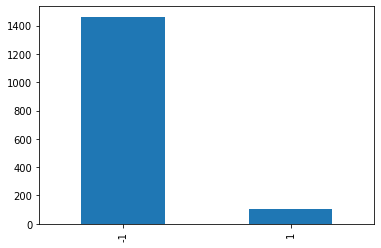

In [167]:
#The bar plot below also shows us that the classes are not balanced
result["Pass_Fail"].value_counts().plot(kind="bar")


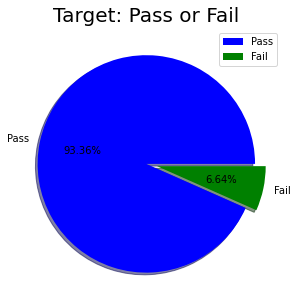

-1    1463
 1     104
Name: Pass_Fail, dtype: int64

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
plt.rcParams['figure.figsize'] = (5, 5)
labels = ['Pass', 'Fail']
size = result['Pass_Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.pie(size, labels=labels, colors=colors,
        explode=explode, autopct="%.2f%%", shadow=True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize=20)
plt.legend()
plt.show()
result["Pass_Fail"].value_counts()


In [173]:
# Get the correlation matrix
import seaborn as sns
import matplotlib as plt
corr = result.corr()


In [174]:
print(corr)

             feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0     1.000000  -0.047782   0.007590   0.009448  -0.000915   0.008706   
feature_1    -0.047782   1.000000  -0.030448   0.006021   0.002192  -0.030127   
feature_2     0.007590  -0.030448   1.000000   0.323782   0.020438   0.990089   
feature_3     0.009448   0.006021   0.323782   1.000000  -0.054015   0.286397   
feature_4    -0.000915   0.002192   0.020438  -0.054015   1.000000   0.007041   
...                ...        ...        ...        ...        ...        ...   
feature_586   0.044745  -0.009219   0.015733   0.038755  -0.043693   0.019435   
feature_587   0.005233   0.039479  -0.007090  -0.038371  -0.030930  -0.003077   
feature_588   0.003918   0.040500  -0.009122  -0.033648  -0.026046  -0.004919   
feature_589   0.021489   0.044464  -0.030434  -0.084449   0.050741  -0.026117   
Pass_Fail     0.006149  -0.019672   0.024929  -0.016341  -0.013577   0.025315   

             feature_6  fea

B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis


In [176]:
#Remove the highly collinear features from results dataframe
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0],
                      "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x


In [177]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
result = remove_collinear_features(result, 0.70)


feature_5 | feature_2 | 0.99
feature_6 | feature_2 | 0.82
feature_6 | feature_5 | 0.84
feature_7 | feature_2 | 0.75
feature_7 | feature_5 | 0.77
feature_12 | feature_11 | 0.83
feature_17 | feature_11 | 0.81
feature_18 | feature_11 | 0.72
feature_18 | feature_12 | 0.79
feature_18 | feature_17 | 0.9
feature_22 | feature_21 | 0.75
feature_26 | feature_25 | 0.83
feature_27 | feature_25 | 0.98
feature_27 | feature_26 | 0.79
feature_30 | feature_29 | 0.86
feature_34 | feature_32 | 0.88
feature_35 | feature_34 | 0.83
feature_37 | feature_32 | 0.75
feature_37 | feature_34 | 0.75
feature_38 | feature_32 | 0.72
feature_38 | feature_34 | 0.72
feature_38 | feature_36 | 0.71
feature_38 | feature_37 | 0.97
feature_39 | feature_32 | 0.81
feature_39 | feature_34 | 0.91
feature_39 | feature_35 | 0.71
feature_39 | feature_37 | 0.86
feature_39 | feature_38 | 0.84
feature_43 | feature_42 | 0.82
feature_44 | feature_42 | 0.82
feature_46 | feature_42 | 0.84
feature_46 | feature_43 | 0.84
feature_46 | featur

C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

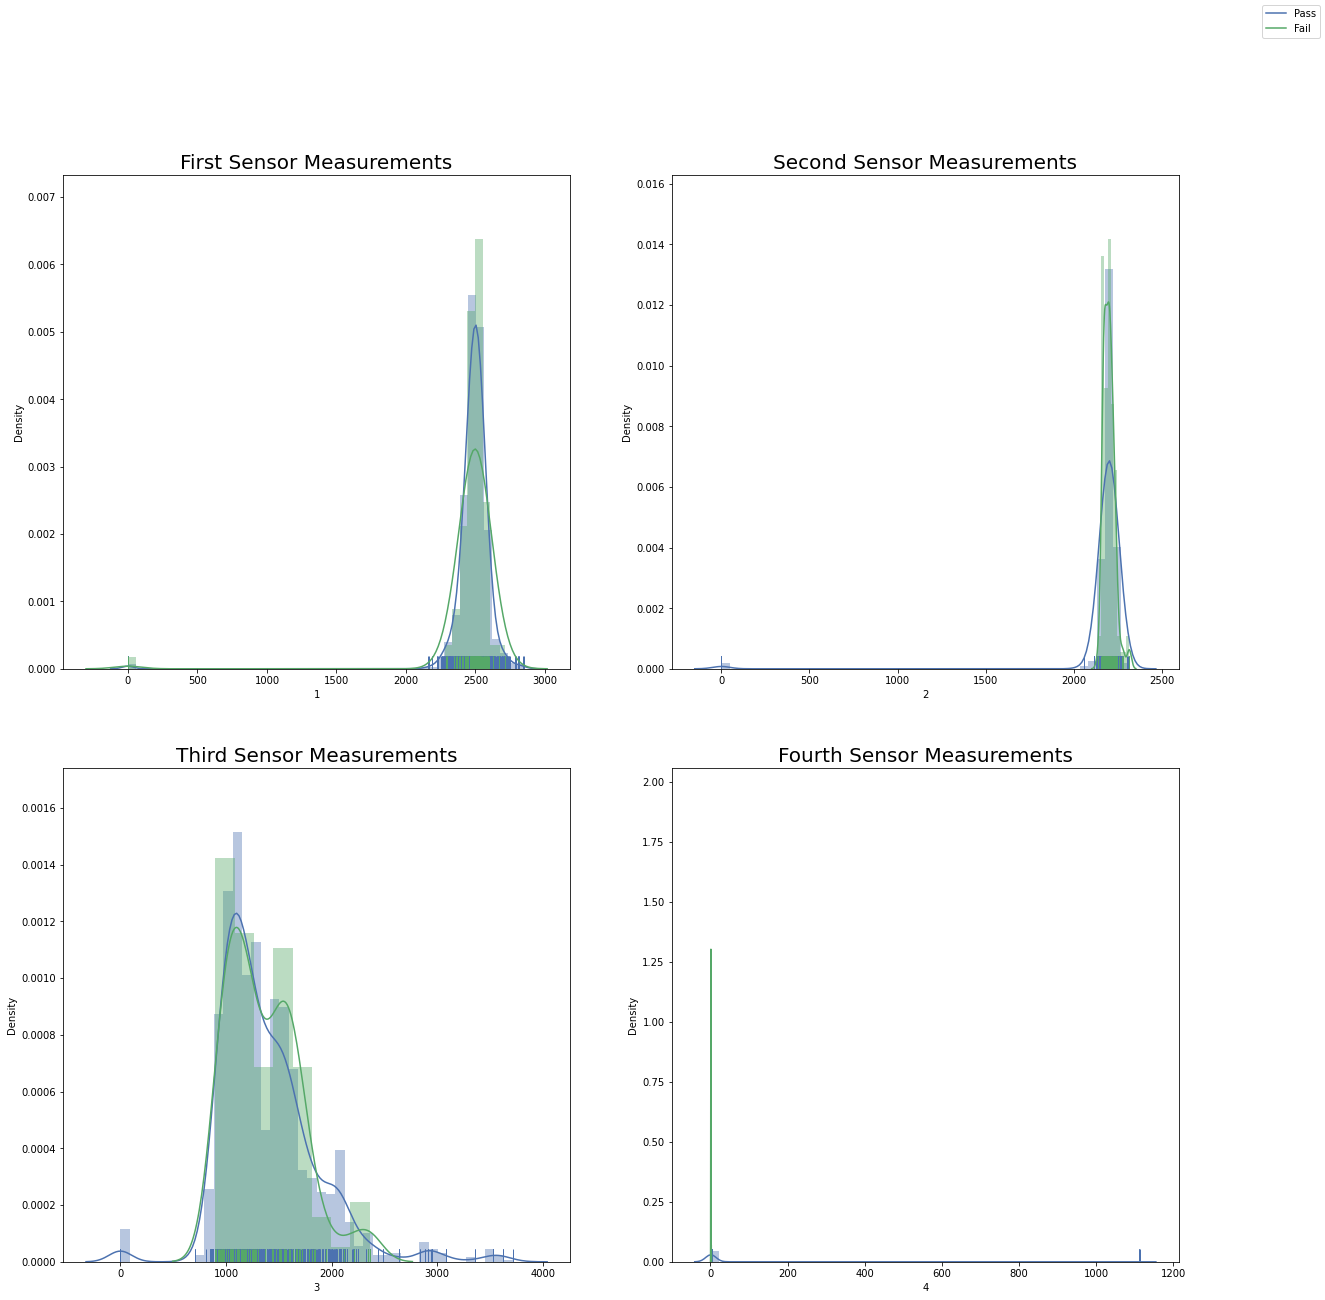

In [190]:
signaldataframe = pd.read_csv('./signal-data.csv')
data = signaldataframe.replace(np.NaN, 0)

# again, checking if there is any NULL values left
data.isnull().any().any()
unique_vals = data['Pass/Fail'].unique()  # [0, 1, 2]
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]
fig = plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize=20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize=20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize=20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize=20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass', 'Fail'])
plt.show()


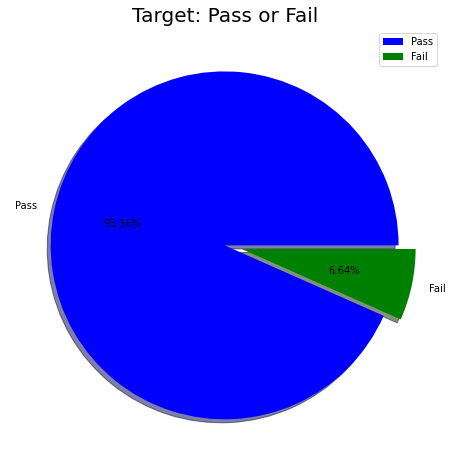

<AxesSubplot:>

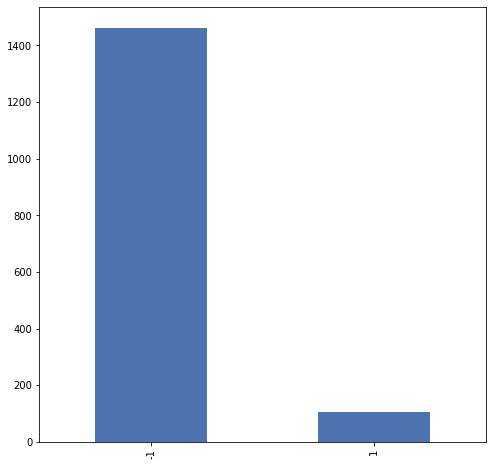

In [191]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels=labels, colors=colors,
        explode=explode, autopct="%.2f%%", shadow=True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize=20)
plt.legend()
plt.show()
data['Pass/Fail'].value_counts().plot(kind="bar")


In [ ]:
"""
We can see the significant amount of difference between the pass and fail data which means here -1 and 1 and also same we can see via pie chart, significant difference in the distribution of data
"""

### 4. Data pre-processing: 

A. Segregate predictors vs target attributes.

In [192]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

In [193]:
# checking the shape of the data after deleting a column
data.shape


(1567, 591)

B. Check for target balancing and fix it if found imbalanced

In [196]:
print('Top 5 features with highest positive skewness')
df = data.drop('Pass/Fail', 1).skew().sort_values(ascending=False)
df[:5]


Top 5 features with highest positive skewness


<ipython-input-196-ec76b305eff5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = data.drop('Pass/Fail', 1).skew().sort_values(ascending=False)


209    39.585351
478    39.585351
347    39.585351
206    39.585351
74     39.585351
dtype: float64

Distribution of feature with highest skewness: 209


<ipython-input-200-4a5cc358ba22>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = data.drop('Pass/Fail', 1).skew().sort_values(ascending=False)


<AxesSubplot:>

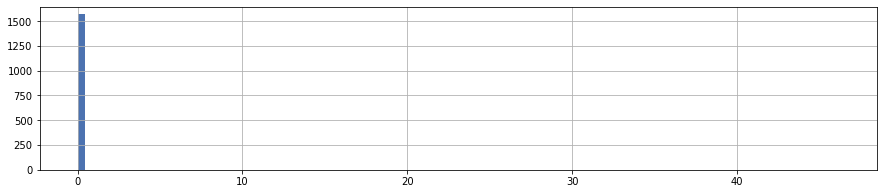

In [200]:
df = data.drop('Pass/Fail', 1).skew().sort_values(ascending=False)
x = df.index[0]
print('Distribution of feature with highest skewness: '+x)
data[x].value_counts().head(10)
data[x].hist(bins=100, figsize=(15, 3))


In [201]:
# return percentage of outliers for each numerical column
def IQR_outliers(data, limit=1.5):
    # extract list of numeric columns
    numColumns = data.select_dtypes(include=np.number).columns.tolist()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1
    outliers = ((data[numColumns] < (Q1 - limit*IQR)) |
                (data[numColumns] > (Q3 + limit*IQR))).sum()*100/data.shape[0]
    return outliers


In [204]:
df = data.drop(['Pass/Fail'], 1).copy()
outliers = IQR_outliers(df)
outliers


<ipython-input-204-ea1d62d52559>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = data.drop(['Pass/Fail'], 1).copy()


0      3.509892
1      5.807275
2      2.488832
3      4.148054
4      3.956605
         ...   
585    5.041481
586    2.042119
587    3.828973
588    4.148054
589    8.487556
Length: 590, dtype: float64

In [205]:
"""
There are too may IQR outliers to remove. In case of removal, there is a possibility that the nature of data might change, given the small size of 'Pass/Fail' data. Thus it might be better to use a different strategy.
"""


"\nThere are too may IQR outliers to remove. In case of removal, there is a possibility that the nature of data might change, given the small size of 'Pass/Fail' data. Thus it might be better to use a different strategy.\n"

C. Perform train-test split and standardise the data or vice versa if required.

In [206]:
x = data.iloc[:, :306]
y = data["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)


shape of x: (1567, 306)
shape of y: (1567,)


In [207]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)


shape of x_train:  (1096, 306)
shape of x_test:  (471, 306)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [208]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [210]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
model = XGBClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D. Check if the train and test data have similar statistical characteristics when compared with origina

<AxesSubplot:>

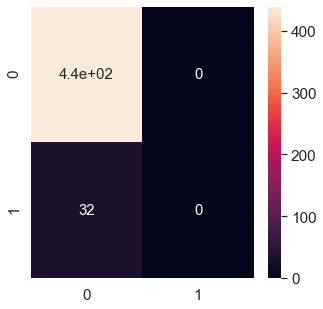

In [211]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style='dark', font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 15})


In [212]:
print("Accuracy: ", model.score(x_test, y_test)*100)


Accuracy:  93.20594479830149


In [213]:
"""
In the failure class we have only 1 observation classified correctly for XGBoost but still has 94.5% accuracy as we predicted correctly on the observations that passed
"""


'\nIn the failure class we have only 1 observation classified correctly for XGBoost but still has 94.5% accuracy as we predicted correctly on the observations that passed\n'

### 5. Model training, testing and tuning:

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


A. Use any Supervised Learning technique to train a mode

In [215]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

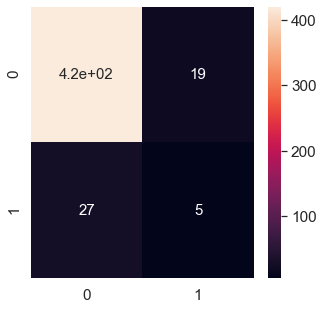

In [216]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style='dark', font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 15})


B. Use cross validation techniques. 

In [218]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(
    x, y, test_size=0.3, random_state=1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)


(1096, 306)
(1096,)
(471, 306)
(471,)


In [219]:
# Applying Grid Search CV to find the best model with the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth': [1, 2, 3, 4, 5, 6],
              'cv': [2, 4, 6, 8, 10],
               'random_state': [1]}]

grid_search = GridSearchCV(
    estimator=model, param_grid=parameters, scoring='accuracy',  n_jobs=-1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [220]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)


Best Accuracy:  93.4304690743047
Best Parameter:  {'cv': 2, 'max_depth': 4, 'random_state': 1}


C. Apply hyper-parameter tuning techniques to get the best accuracy

In [225]:

#Using Grid Search to search the hyper parameter space
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
rf = RandomForestClassifier(n_estimators=50, random_state=1)
grid_search = GridSearchCV(rf, param_grid=param_grid)
grid_search.fit(x_train_us, y_train_us)


GridSearchCV(estimator=RandomForestClassifier(n_estimators=50, random_state=1),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [226]:
#Get the best parameters for Random Forest
grid_search.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [227]:
#Mean Test Scores across the models
grid_search.cv_results_['mean_test_score']


array([0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430884,
       0.93430884, 0.93430884, 0.93430884, 0.93430884, 0.93430

In [228]:
#Best Model Parameters
grid_search.best_estimator_


RandomForestClassifier(max_depth=3, max_features=1, n_estimators=50,
                       random_state=1)

D. Use any other technique/method which can enhance the model performance. [

In [229]:
from imblearn.over_sampling import RandomOverSampler, SMOTE


In [230]:
oversampler = RandomOverSampler(random_state=1)
X_train_os, y_train_os = oversampler.fit_resample(x_train, y_train)


In [231]:
y_train.value_counts()


-1    1024
 1      72
Name: Pass/Fail, dtype: int64

In [236]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = data.drop(['Pass/Fail'], axis=1)
y = data['Pass/Fail']
x_scaled = sc_x.fit_transform(x)
x_scaled


array([[ 0.13999828,  0.42920791,  0.03273532, ..., -1.86846064,
        -1.84076867, -1.0611589 ],
       [ 0.46402024, -0.10587396,  0.23685169, ...,  0.41258698,
         0.25102908,  1.15695081],
       [-0.35125598,  0.40723307,  0.02641324, ...,  3.62421124,
         3.31899911, -0.17840653],
       ...,
       [-0.12041844, -0.5678868 ,  0.12151173, ..., -0.89249002,
        -0.96918628, -0.59748491],
       [-0.53957345,  0.25606135, -0.01842658, ...,  0.91192079,
         0.77397852, -0.06511812],
       [-0.28974927, -0.18370602,  0.06960583, ..., -0.03000435,
        -0.27192036,  0.40672924]])

In [237]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_scaled)
x_reduced = pca.transform(x_scaled)
np.shape(x_reduced)


(1567, 158)

In [241]:

scikit_log_reg = LogisticRegression()
scikit_log_reg.fit(x_train, y_train)
y_pred = scikit_log_reg.predict(x_test)


C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


E. Display and explain the classification report in detail. [

In [242]:
cm = confusion_matrix(y_test, y_pred)
cm
""" 
As we see from the below classification matrix we got negative and predicted negative in high amount tha positive and predicted positive.

TN / True Negative: the case was negative and predicted negative
TP / True Positive: the case was positive and predicted positive
FN / False Negative: the case was positive but predicted negative
FP / False Positive: the case was negative but predicted positive
"""


array([[420,  19],
       [ 27,   5]], dtype=int64)

F. Apply the above steps for all possible models that you have learnt so far.

In [248]:
#preparing the models
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm
#Split data into X,y
X = data.drop("Pass/Fail", axis=1)
y = data["Pass/Fail"]
models = {"RandomForestClassifier": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "DecisionTreeClassifier": tree.DecisionTreeClassifier(),
          "svm": svm.SVC()}


In [249]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2,random_state=160)

np.random.seed(42)

#fitting the models and compare their metrics
scores = {}
for name, model in models.items():
    clf = model.fit(X_train, y_train)
    scores[name] = clf.score(X_test, y_test)

scores


{'RandomForestClassifier': 0.9554140127388535,
 'KNN': 0.9522292993630573,
 'DecisionTreeClassifier': 0.8949044585987261,
 'svm': 0.9554140127388535}

In [254]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rfc_mdl = RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=param_grid,
                             n_iter=30,
                             cv=5,
                             verbose=True)

rfc_mdl.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 3, 10],
                                        'min_samples_leaf': [1, 3, 10],
                                        'min_samples_split': [2, 3, 10]},
                   verbose=True)

In [255]:
rfc_mdl.best_params_


{'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 3,
 'criterion': 'entropy',
 'bootstrap': True}

In [256]:
rfc_mdl.score(X_test, y_test)


0.9554140127388535

### 6. Post Training and Conclusion: 

A. Display and compare all the models designed with their train and test accuracies.


In [257]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef
#preparing evaluate_model function
def evaluate_model(model):
    y_pred = model.predict(X_test)
    y_true = y_test

    scores = {
        "Precision": "{:.2f}".format(precision_score(y_true, y_pred, zero_division=0)*100),
        "Recall": "{:.2f}".format(recall_score(y_true, y_pred)*100),
        "f1": "{:.2f}".format(f1_score(y_true, y_pred)*100),
        "Accuracy": "{:.2f}".format(accuracy_score(y_true, y_pred)*100)}

    plot_confusion_matrix(model,
                          X_test,
                          y_test)

    plot_roc_curve(model,
                   X_test,
                   y_test)

    return scores


{'Precision': '0.00', 'Recall': '0.00', 'f1': '0.00', 'Accuracy': '95.54'}

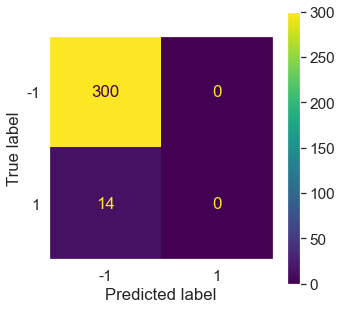

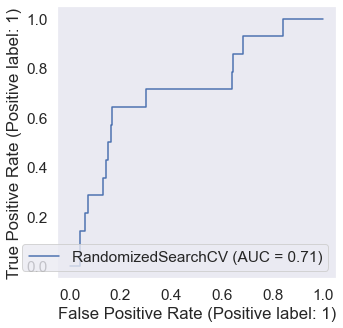

In [258]:
evaluate_model(rfc_mdl)


B. Select the final best trained model along with your detailed comments for selecting this model.

In [259]:
"""
The final best trained model seems to be with RandomizedSearchCV using RandomForestClassifier as its accuracy is greater than 80%   
"""

'\nThe final best trained model seems to be with RandomizedSearchCV using RandomForestClassifier as its accuracy is greater than 80%   \n'

C. Pickle the selected model for future use

In [260]:
import pickle
pickle.dump(rfc_mdl, open("Rfc.pkl","wb"))

D. Write your conclusion on the results

In [261]:
"""
If we observe the above trained models including PCM
Overall performace

Best f1 score (test, Fail=1): xgb without pca: 0.34
Best cv score: Logistic regression without PCA: 0.2021
Best precision (test set, Fail=1): xb with pca: 0.385
Best Recall (test set, Fail=1): Logistic regression with pca; 0.692
"""


'\nIf we observe the above trained models including PCM\nOverall performace\n\nBest f1 score (test, Fail=1): xgb without pca: 0.34\nBest cv score: Logistic regression without PCA: 0.2021\nBest precision (test set, Fail=1): xb with pca: 0.385\nBest Recall (test set, Fail=1): Logistic regression with pca; 0.692\n'